<a href="https://colab.research.google.com/github/alastra32/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module4-clustering/Cell_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

Your assignment is to use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

It may be helpful to use PCA to reduce the dimensions of your data first in order to obtain --but then again, maybe not. I dunno, you're the data scientist, you tell me.🤪 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [2]:
df1 = df.drop(['diagnosis','Unnamed: 32'], axis=1)
df1.head()

id  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0    842302        17.99  ...          0.4601                  0.11890
1    842517        20.57  ...          0.2750                  0.08902
2  84300903        19.69  ...          0.3613                  0.08758
3  84348301        11.42  ...          0.6638                  0.17300
4  84358402        20.29  ...          0.2364                  0.07678

[5 rows x 31 columns]

# You take it from here!

See what you can come up with. You have all the know-how! 

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to do PCA on this data to see if that helps you find distinct linearly-separable clusters.
  - (In the real world, truly linearly-separable clusters are rare.)
- You might want to use an elbow chart to decide on the number of clusters to use.
- You might want to use a scree plot to decide how many principal components to include in your clustering.
- You might want to standardize your data before PCA (If you decide to use PCA). 

## Manage your time and don't spend it all on data exploration or something like that. You got this!

#Data exploration

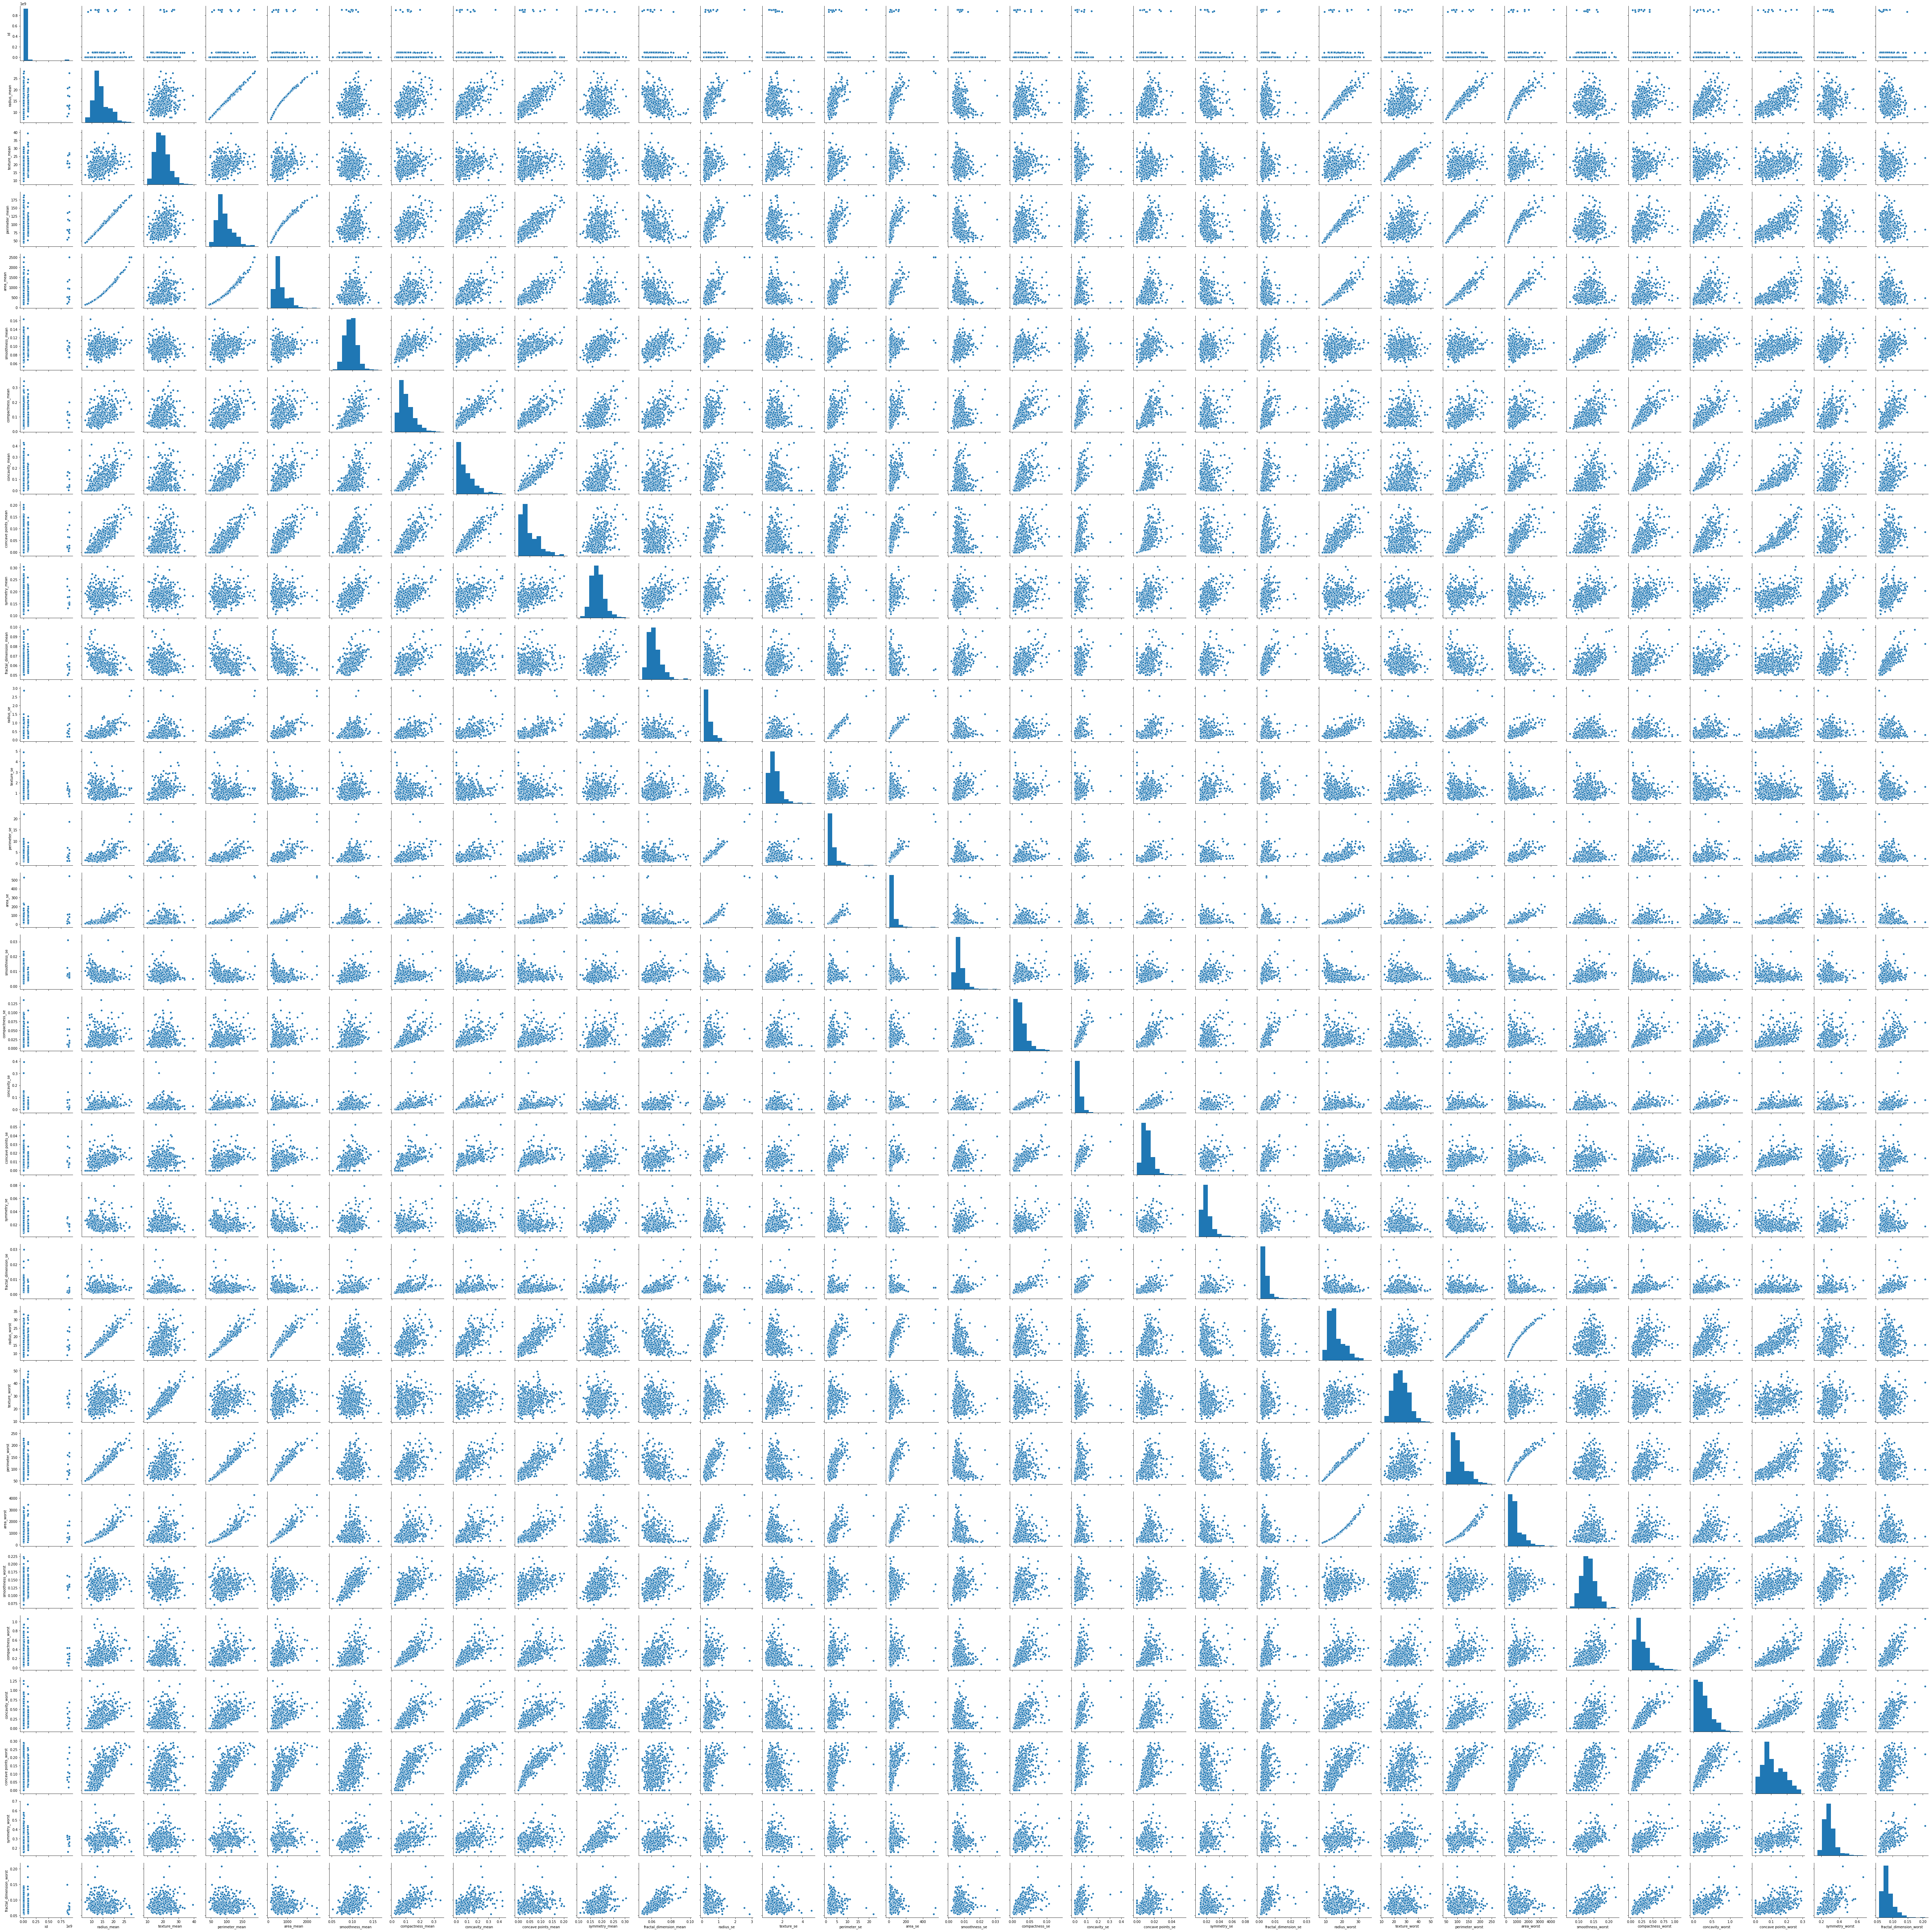

In [3]:
import seaborn as sns

sns.pairplot(df1);

In [4]:
df1.isna().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
df1.describe()

id  radius_mean  ...  symmetry_worst  fractal_dimension_worst
count  5.690000e+02   569.000000  ...      569.000000               569.000000
mean   3.037183e+07    14.127292  ...        0.290076                 0.083946
std    1.250206e+08     3.524049  ...        0.061867                 0.018061
min    8.670000e+03     6.981000  ...        0.156500                 0.055040
25%    8.692180e+05    11.700000  ...        0.250400                 0.071460
50%    9.060240e+05    13.370000  ...        0.282200                 0.080040
75%    8.813129e+06    15.780000  ...        0.317900                 0.092080
max    9.113205e+08    28.110000  ...        0.663800                 0.207500

[8 rows x 31 columns]

#PCA

In [0]:
from sklearn.preprocessing import StandardScaler

x=StandardScaler().fit_transform(df1)

In [7]:
# Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(2)
# fit on data
pca.fit(x)
# access values and vectors
print("\n Eigenvectors: \n", pca.components_.round(decimals=4))
print("\n Eigenvalues: \n",pca.explained_variance_.round(decimals=4))
print('\n Explained Variance Ratio: \n', pca.explained_variance_ratio_.round(decimals=4))
# transform data
B = pca.transform(x)
print("\n Projected Data: \n", B.round(decimals=4))


 Eigenvectors: 
 [[ 0.0229  0.2189  0.1038  0.2275  0.221   0.1424  0.2391  0.2583  0.2607
   0.138   0.0641  0.2061  0.0174  0.2114  0.2031  0.0147  0.1703  0.1535
   0.1834  0.0424  0.1025  0.228   0.1045  0.2366  0.2249  0.1278  0.2099
   0.2286  0.2507  0.1227  0.1316]
 [-0.0341 -0.2333 -0.06   -0.2146 -0.2307  0.1864  0.1525  0.0605 -0.0342
   0.1907  0.3665 -0.1059  0.0895 -0.0898 -0.1528  0.2032  0.2325  0.1968
   0.13    0.1836  0.2796 -0.2193 -0.0455 -0.1993 -0.219   0.1726  0.1443
   0.0985 -0.0075  0.1426  0.2757]]

 Eigenvalues: 
 [13.3115  5.7068]

 Explained Variance Ratio: 
 [0.4286 0.1838]

 Projected Data: 
 [[ 9.1832  1.9713]
 [ 2.3833 -3.7535]
 [ 5.7425 -1.0804]
 ...
 [ 1.2519 -1.894 ]
 [10.365   1.6964]
 [-5.4783 -0.6728]]


In [8]:
df2 = pd.DataFrame(B)

df2.columns=['x','y']
df2.head()

x          y
0  9.183200   1.971271
1  2.383298  -3.753459
2  5.742472  -1.080350
3  7.124384  10.272225
4  3.945694  -1.959689

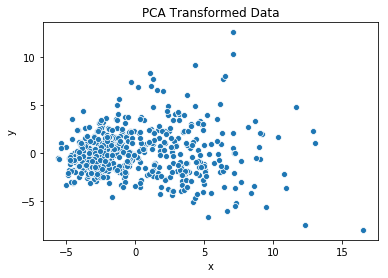

In [9]:
#scatterplot
sns.scatterplot(x='x',y='y',data= df2);
plt.title('PCA Transformed Data');


#Elbow chart to decide on the number of clusters to use

In [0]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df2)
    sum_of_squared_distances.append(km.inertia_)

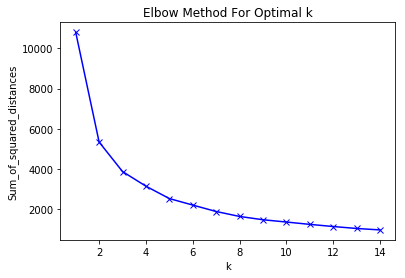

In [11]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#K Clusters

In [12]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=2)
kmeans.fit(df2)
labels = kmeans.labels_

print(labels)

[1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 1 

In [13]:
# Add our new labels to the dataframe
new_series = pd.Series(labels)
df2['cluster_1'] = new_series.values

df2.head()

x          y  cluster_1
0  9.183200   1.971271          1
1  2.383298  -3.753459          1
2  5.742472  -1.080350          1
3  7.124384  10.272225          1
4  3.945694  -1.959689          1

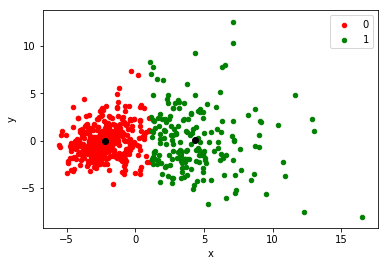

In [14]:
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'yellow'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()
def get_centroids(df, column_header):
  x = [df.x[df[column_header]==0].mean(), df.x[df[column_header]==1].mean(), df.x[df[column_header]==2].mean()]
  y = [df.y[df[column_header]==0].mean(), df.y[df[column_header]==1].mean(), df.y[df[column_header]==2].mean()]
  data = {'x': x, 'y' : y}
  return pd.DataFrame(data)
  
  
centroids = get_centroids(df2, 'cluster_1')
plot_clusters(df2, 'cluster_1', centroids)

# Stretch Goal:

Once you are satisfied with your clustering, go back and add back in the labels from the original dataset to check how accurate your clustering was. Remember that this will not be a possibility in true unsupervised learning, but it might be a helpful for your learning to be able to check your work against the "ground truth". Try different approaches and see which one is the most successful and try understand why that might be the case. If you go back and try different methods don't ever include the actual "diagnosis" labels in your clustering or PCA.

**Side Note** Data Science is never DONE. You just reach a point where the cost isn't worth the benefit anymore. There's always more moderate to small improvements that we could make. Don't be a perfectionist, be a pragmatist.

In [15]:
print(df2.shape)

(569, 3)


In [0]:
df2['diagnosis']=df['diagnosis']

In [18]:
df2.head()

x          y  cluster_1 diagnosis
0  9.183200   1.971271          1         M
1  2.383298  -3.753459          1         M
2  5.742472  -1.080350          1         M
3  7.124384  10.272225          1         M
4  3.945694  -1.959689          1         M

In [0]:
df2['diagnosis1']=df['diagnosis'].replace('M',1).replace('B',0)


In [33]:
df2.head()

x          y  cluster_1 diagnosis  diagnosis1
0  9.183200   1.971271          1         M           1
1  2.383298  -3.753459          1         M           1
2  5.742472  -1.080350          1         M           1
3  7.124384  10.272225          1         M           1
4  3.945694  -1.959689          1         M           1

In [34]:
df2.cluster_1.value_counts()

0    378
1    191
Name: cluster_1, dtype: int64

In [35]:
df2.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [36]:
df2.diagnosis1.value_counts()

0    357
1    212
Name: diagnosis1, dtype: int64

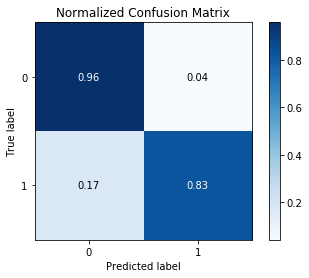

In [37]:
#confusion matrix
import scikitplot as skplt

y_pred =df2['cluster_1']
y_test=df2['diagnosis1']

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

plt.show()